## Looking at Kp index and E1

- Imports and loading in data

- Merge data

 3. PCi, Au, 

In [1]:
# imports!
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import datetime
from scipy.stats import iqr

from sklearn.linear_model import LinearRegression
#import NotebookApp

# changing data_rate_limit
#--NotebookApp.iopub_data_rate_limit = 1e10
#--NotebookApp.iopub_data_rate_limit

In [2]:
# polar cap indexes (PC index) are relevant to E1

In [3]:
# load in DLL data

f = open("DLL_zenodo_1995_T1h.txt", "r")

lines = [next(f) for _ in range(408134)]
remainder_of_file = f.read()  
f.close()

#making a nested list - possible implemmentation 
dataframe = []
for line in lines[21:]:
    data = line.split()
    dataframe.append(data)
    
df_1995 = pd.DataFrame(dataframe, columns = ["Date", "Day-of-year", "Time", "hourly avg location for the magnetopause B_barre", "hourly variance for the magnetopause", "lifetime for the autocorrelation function", "magnitude for radial diffusion"] )
df_1995

,Date,Day-of-year,Time,hourly avg location for the magnetopause B_barre,hourly variance for the magnetopause,lifetime for the autocorrelation function,magnitude for radial diffusion
0,1995/01/01,001,04:17,9.73e+00,3.60e-03,2.05e+00,-9.11e+00
1,1995/01/01,001,04:19,9.73e+00,3.24e-03,2.22e+00,-9.12e+00
2,1995/01/01,001,04:21,9.73e+00,3.29e-03,2.23e+00,-9.12e+00
3,1995/01/01,001,04:23,9.73e+00,3.20e-03,2.25e+00,-9.12e+00
4,1995/01/01,001,04:24,9.73e+00,3.12e-03,2.26e+00,-9.13e+00
...,...,...,...,...,...,...,...
408108,1995/12/31,365,23:54,1.00e+01,1.16e-02,3.63e+00,-8.48e+00
408109,1995/12/31,365,23:55,1.00e+01,1.20e-02,4.09e+00,-8.41e+00
408110,1995/12/31,365,23:56,1.00e+01,1.23e-02,4.31e+00,-8.38e+00
408111,1995/12/31,365,23:57,1.00e+01,1.26e-02,4.48e+00,-8.35e+00


In [4]:
# load in NASA data
f = open("1995 NASA Data.lst", "r")

lines = [next(f) for _ in range(8760)]
remainder_of_file = f.read()  
f.close()

# captions
nasa_captions = ["YEAR", "DOY", "Hour", "Scalar B, nT", "Vector B Magnitude, nT", "Lat. Angle of B (GSE)", "Long. Angle of B (GSE)", "BX, nT (GSE, GSM)", "BY, nT (GSE)", "BZ, nT (GSE)", "BY, nT (GSM)", "BZ, nT (GSM)", "RMS_magnitude, nT", "RMS_field_vector, nT", "RMS_BX_GSE, nT", "RMS_BY_GSE, nT", "RMS_BZ_GSE, nT", "SW Plasma Temperature, K", "SW Proton Density, N/cm^3", "SW Plasma Speed, km/s", "SW Plasma flow long. angle", "SW Plasma flow lat. angle", "Alpha/Prot. ratio", "sigma-T,K", "sigma-n, N/cm^3)", "sigma-V, km/s", "sigma-phi V, degrees", "sigma-theta V, degrees", "sigma-ratio", "Flow pressure", "E elecrtric field", "Plasma Beta", "Alfen mach number", "Magnetosonic Much num.", "Quasy-Invariant", "Kp index", "R (Sunspot No.)", "Dst-index, nT", "ap_index, nT", "f10.7_index", "AE-index, nT", "AL-index, nT", "AU-index, nT", "pc-index", "Lyman_alpha"]

#making a nested list - possible implemmentation 
dataframe = []
for line in lines:
    data = line.split()
    dataframe.append(data)

nasa_data_1995 = pd.DataFrame(dataframe, columns =  nasa_captions)
nasa_data_1995

,YEAR,DOY,Hour,"Scalar B, nT","Vector B Magnitude, nT",Lat. Angle of B (GSE),Long. Angle of B (GSE),"BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)",...,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha
0,1995,1,0,4.0,3.9,-32.9,100.8,-0.6,3.2,-2.1,...,10,13,-2,4,72.9,32,-6,25,0.3,0.006201
1,1995,1,1,3.0,2.9,-27.1,110.7,-0.9,2.4,-1.3,...,10,13,3,4,72.9,38,-11,26,0.4,0.006201
2,1995,1,2,3.2,1.9,-13.0,75.1,0.5,1.8,-0.4,...,10,13,6,4,72.9,34,-12,20,0.1,0.006201
3,1995,1,3,4.3,4.0,4.4,142.1,-3.2,2.5,0.3,...,0,13,5,0,72.9,36,-11,24,-0.0,0.006201
4,1995,1,4,4.8,4.8,3.9,154.3,-4.3,2.1,0.3,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1995,365,19,6.0,5.7,29.1,319.9,3.8,-3.2,2.8,...,20,0,-10,7,72.7,248,-196,51,0.6,0.006399
8756,1995,365,20,7.1,7.0,33.7,319.0,4.4,-3.8,3.9,...,20,0,-11,7,72.7,90,-39,49,0.1,0.006399
8757,1995,365,21,7.0,6.9,31.6,301.0,3.0,-5.0,3.6,...,10,0,-10,4,72.7,34,0,34,0.0,0.006399
8758,1995,365,22,5.6,3.7,22.7,181.2,-3.5,-0.1,1.4,...,10,0,-7,4,72.7,34,-5,28,-0.0,0.006399


In [5]:
nasa_data_1995["DOY"] = nasa_data_1995["DOY"].astype(int)
nasa_data_1995["Hour"] = nasa_data_1995["Hour"].astype(int)

NASA Captions

FORMAT OF THE SUBSETTED FILE

    ITEMS                      FORMAT   

 0 YEAR                          I4        
 1 DOY                           I4        
 2 Hour                          I3        
 3 Scalar B, nT                  F6.1      
 4 Vector B Magnitude,nT         F6.1      
 5 Lat. Angle of B (GSE)         F6.1      
 6 Long. Angle of B (GSE)        F6.1      
 7 BX, nT (GSE, GSM)             F6.1      
 8 BY, nT (GSE)                  F6.1      
9 BZ, nT (GSE)                  F6.1      
10 BY, nT (GSM)                  F6.1      
11 BZ, nT (GSM)                  F6.1      
12 RMS_magnitude, nT             F6.1      
13 RMS_field_vector, nT          F6.1      
14 RMS_BX_GSE, nT                F6.1      
15 RMS_BY_GSE, nT                F6.1      
16 RMS_BZ_GSE, nT                F6.1      
17 SW Plasma Temperature, K      F9.0      
18 SW Proton Density, N/cm^3     F6.1      
19 SW Plasma Speed, km/s         F6.0      
20 SW Plasma flow long. angle    F6.1      
21 SW Plasma flow lat. angle     F6.1      
22 Alpha/Prot. ratio             F6.3      
23 sigma-T,K                     F9.0      
24 sigma-n, N/cm^3)              F6.1      
25 sigma-V, km/s                 F6.0      
26 sigma-phi V, degrees          F6.1      
27 sigma-theta V, degrees        F6.1      
28 sigma-ratio                   F6.3      
29 Flow pressure                 F6.2      
30 E elecrtric field             F7.2      
31 Plasma Beta                   F7.2      
32 Alfen mach number             F6.1      
33 Magnetosonic Much num.        F5.1      
34 Quasy-Invariant               F7.4      
35 Kp index                      I3        
36 R (Sunspot No.)               I4        
37 Dst-index, nT                 I6        
38 ap_index, nT                  I4        
39 f10.7_index                   F6.1      
40 AE-index, nT                  I5        
41 AL-index, nT                  I6        
42 AU-index, nT                  I6        
43 pc-index                      F6.1      
44 Lyman_alpha                   F9.6  

In [6]:
type(nasa_data_1995["YEAR"].iloc[0])

str

In [7]:
df_1995["Day-of-year"] = df_1995["Day-of-year"].astype(int)
df_1995["Hour"] = df_1995["Time"].str.split(":").str[0]
#df_1995["Hour"] = df_1995["Hour"].astype(int)
df_1995["Hour"] = df_1995["Hour"].astype(int)
df_1995 = df_1995.drop(columns = ["Time"], axis = 1)
df_1995

,Date,Day-of-year,hourly avg location for the magnetopause B_barre,hourly variance for the magnetopause,lifetime for the autocorrelation function,magnitude for radial diffusion,Hour
0,1995/01/01,1,9.73e+00,3.60e-03,2.05e+00,-9.11e+00,4
1,1995/01/01,1,9.73e+00,3.24e-03,2.22e+00,-9.12e+00,4
2,1995/01/01,1,9.73e+00,3.29e-03,2.23e+00,-9.12e+00,4
3,1995/01/01,1,9.73e+00,3.20e-03,2.25e+00,-9.12e+00,4
4,1995/01/01,1,9.73e+00,3.12e-03,2.26e+00,-9.13e+00,4
...,...,...,...,...,...,...,...
408108,1995/12/31,365,1.00e+01,1.16e-02,3.63e+00,-8.48e+00,23
408109,1995/12/31,365,1.00e+01,1.20e-02,4.09e+00,-8.41e+00,23
408110,1995/12/31,365,1.00e+01,1.23e-02,4.31e+00,-8.38e+00,23
408111,1995/12/31,365,1.00e+01,1.26e-02,4.48e+00,-8.35e+00,23


In [8]:
merged_df = pd.merge(df_1995, nasa_data_1995, how = 'inner', left_on = ["Day-of-year", "Hour"], right_on = ["DOY", "Hour"])
merged_df.head()

,Date,Day-of-year,hourly avg location for the magnetopause B_barre,hourly variance for the magnetopause,lifetime for the autocorrelation function,magnitude for radial diffusion,Hour,YEAR,DOY,"Scalar B, nT",...,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha
0,1995/01/01,1,9.73e+00,3.60e-03,2.05e+00,-9.11e+00,4,1995,1,4.8,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201
1,1995/01/01,1,9.73e+00,3.24e-03,2.22e+00,-9.12e+00,4,1995,1,4.8,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201
2,1995/01/01,1,9.73e+00,3.29e-03,2.23e+00,-9.12e+00,4,1995,1,4.8,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201
3,1995/01/01,1,9.73e+00,3.20e-03,2.25e+00,-9.12e+00,4,1995,1,4.8,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201
4,1995/01/01,1,9.73e+00,3.12e-03,2.26e+00,-9.13e+00,4,1995,1,4.8,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201


## stepwise linear regression 

In [9]:
# before conducting stepwise linear regression, I want to 

In [10]:
for column in merged_df.columns.values[3:]:
    if type(merged_df[column].iloc[0]) == str:
        merged_df[column] = merged_df[column].astype(float)

In [11]:
sampled = merged_df.sample(n = len(merged_df))
training_num = int((len(merged_df) * 0.8))
train_data = sampled[:training_num]
test_data = sampled[training_num:]
target_train = train_data["magnitude for radial diffusion"]

In [12]:
# Looking at the correlations of all the different variables and DDL to get an idea of which variables I should look at in my regression 

target = merged_df["magnitude for radial diffusion"]
features = merged_df.columns.values[3:].tolist()
features.remove("magnitude for radial diffusion")
variables_of_interest = []
for feature in features:
    corr = np.corrcoef(target, merged_df[feature])[0][1]
    if corr > 0.25:
        print(feature, corr)
        variables_of_interest.append(feature)

hourly variance for the magnetopause 0.5232126477871574
lifetime for the autocorrelation function 0.5082640480703573
Flow pressure 0.5079336141663906
Kp index 0.5141561490791968
ap_index, nT 0.4639721933291093
AE-index, nT 0.4161044015278079
AU-index, nT 0.4419712453161352
pc-index 0.39244544836134004
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [13]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 128.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 45.0 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


### Approach #1: backtracting

In [14]:
#performing stepwise regression 
import statsmodels.api as sm

def get_stats():
    x = merged_df[variables_of_interest]
    results = sm.OLS(target, x).fit()
    print(results.summary())
get_stats()


                                       OLS Regression Results                                      
Dep. Variable:     magnitude for radial diffusion   R-squared (uncentered):                   0.821
Model:                                        OLS   Adj. R-squared (uncentered):              0.821
Method:                             Least Squares   F-statistic:                          2.335e+05
Date:                            Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                                    05:14:42   Log-Likelihood:                     -1.0927e+06
No. Observations:                          408113   AIC:                                  2.185e+06
Df Residuals:                              408105   BIC:                                  2.186e+06
Df Model:                                       8                                                  
Covariance Type:                        nonrobust                                                  


In [15]:
x = merged_df[variables_of_interest]
linear_model = LinearRegression()
linear_model.fit(x, target)
x_test = merged_df[variables_of_interest]
y_pred = linear_model.predict(x_test)

The mean squared errors are 0.14755891215298286
Percentage of data above residual = 0 is  0.5340555189371571


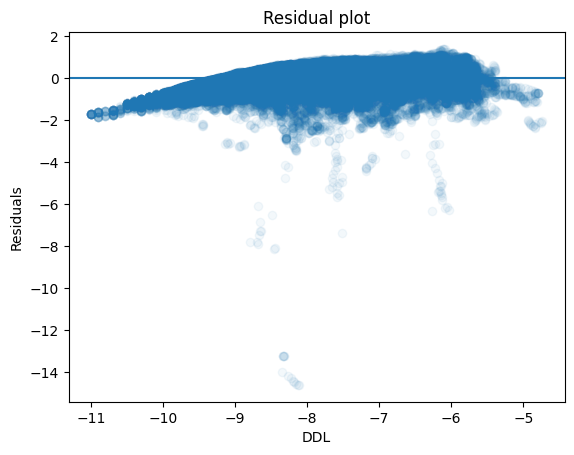

In [16]:
errors = target - y_pred
print("The mean squared errors are", np.sum(errors**2)/ len(errors))
plt.scatter(x = target, y = errors, alpha = 0.05)
plt.title("Residual plot")
plt.xlabel("DDL")
plt.ylabel("Residuals")
plt.axhline(y = 0)
print("Percentage of data above residual = 0 is ", sum(errors >= 0)/len(errors))

In [17]:
#variables_of_interest.remove("hourly variance for the magnetopause")
#variables_of_interest.remove("lifetime for the autocorrelation function")
variables_of_interest.append("AE-index, nT")

def get_stats():
    x = merged_df[variables_of_interest]
    results = sm.OLS(target, x).fit()
    print(results.summary())
get_stats()

                                       OLS Regression Results                                      
Dep. Variable:     magnitude for radial diffusion   R-squared (uncentered):                   0.821
Model:                                        OLS   Adj. R-squared (uncentered):              0.821
Method:                             Least Squares   F-statistic:                          2.335e+05
Date:                            Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                                    05:14:45   Log-Likelihood:                     -1.0927e+06
No. Observations:                          408113   AIC:                                  2.185e+06
Df Residuals:                              408105   BIC:                                  2.186e+06
Df Model:                                       8                                                  
Covariance Type:                        nonrobust                                                  


The mean squared errors are 0.14755891215298286
Percentage of data above residual = 0 is  0.5340555189371571


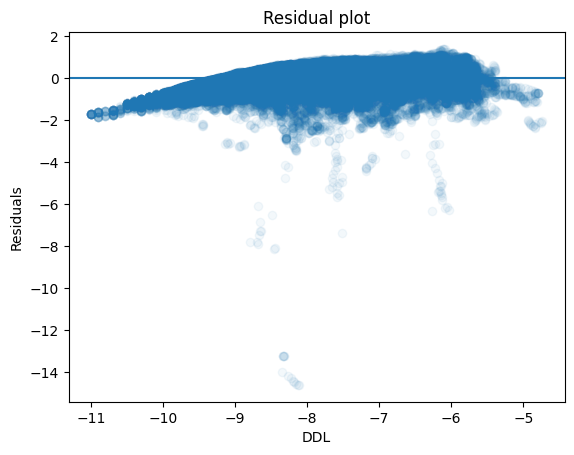

In [18]:
x = merged_df[variables_of_interest]
linear_model = LinearRegression()
linear_model.fit(x, target)
x_test = merged_df[variables_of_interest]
y_pred = linear_model.predict(x_test)

errors = target - y_pred
print("The mean squared errors are", np.sum(errors**2)/ len(errors))
plt.scatter(x = target, y = errors, alpha = 0.05)
plt.title("Residual plot")
plt.xlabel("DDL")
plt.ylabel("Residuals")
plt.axhline(y = 0)
print("Percentage of data above residual = 0 is ", sum(errors >= 0)/len(errors))

In [19]:
variables_of_interest.remove("AE-index, nT")

def get_stats():
    x = merged_df[variables_of_interest]
    results = sm.OLS(target, x).fit()
    print(results.summary())
get_stats()


                                       OLS Regression Results                                      
Dep. Variable:     magnitude for radial diffusion   R-squared (uncentered):                   0.821
Model:                                        OLS   Adj. R-squared (uncentered):              0.821
Method:                             Least Squares   F-statistic:                          2.335e+05
Date:                            Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                                    05:14:48   Log-Likelihood:                     -1.0927e+06
No. Observations:                          408113   AIC:                                  2.185e+06
Df Residuals:                              408105   BIC:                                  2.186e+06
Df Model:                                       8                                                  
Covariance Type:                        nonrobust                                                  


The mean squared errors are 0.14755891215298286
Percentage of data above residual = 0 is  0.5340555189371571


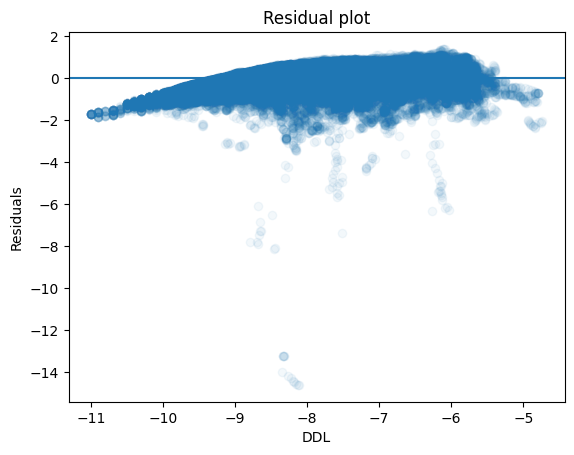

In [20]:
x = merged_df[variables_of_interest]
linear_model = LinearRegression()
linear_model.fit(x, target)
x_test = merged_df[variables_of_interest]
y_pred = linear_model.predict(x_test)

errors = target - y_pred
print("The mean squared errors are", np.sum(errors**2)/ len(errors))
plt.scatter(x = target, y = errors, alpha = 0.05)
plt.title("Residual plot")
plt.xlabel("DDL")
plt.ylabel("Residuals")
plt.axhline(y = 0)
print("Percentage of data above residual = 0 is ", sum(errors >= 0)/len(errors))

In [21]:
train_data

,Date,Day-of-year,hourly avg location for the magnetopause B_barre,hourly variance for the magnetopause,lifetime for the autocorrelation function,magnitude for radial diffusion,Hour,YEAR,DOY,"Scalar B, nT",...,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha
51222,1995/02/25,56,1.03e+01,0.007520,2.32,-8.99,18,1995.0,56,5.9,...,3.0,43.0,-1.0,2.0,81.6,31.0,-24.0,6.0,0.2,0.006590
376080,1995/12/03,337,9.04e+00,0.006220,6.21,-8.08,0,1995.0,337,5.2,...,10.0,24.0,-11.0,4.0,71.2,80.0,-34.0,45.0,0.3,0.006311
297563,1995/09/23,266,8.87e+00,0.032100,2.68,-7.65,1,1995.0,266,7.4,...,33.0,38.0,-4.0,18.0,75.5,379.0,-304.0,74.0,2.3,0.006497
79017,1995/03/22,81,1.12e+01,0.340000,0.98,-8.08,23,1995.0,81,3.6,...,7.0,67.0,6.0,3.0,92.9,30.0,-16.0,13.0,0.0,0.006666
250671,1995/08/15,227,1.10e+01,0.227000,5.20,-7.42,13,1995.0,227,3.2,...,27.0,15.0,-20.0,12.0,73.2,128.0,-64.0,63.0,0.8,0.006271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274873,1995/09/04,247,9.84e+00,0.000474,5.50,-9.61,2,1995.0,247,2.3,...,3.0,21.0,19.0,2.0,75.6,23.0,-9.0,13.0,-0.6,0.006228
320168,1995/10/10,283,1.01e+01,0.009970,1.99,-8.84,13,1995.0,283,7.8,...,10.0,42.0,-26.0,4.0,82.1,71.0,-31.0,39.0,-0.1,0.006394
334245,1995/10/22,295,1.07e+01,0.006720,2.59,-9.16,7,1995.0,295,5.3,...,30.0,38.0,-43.0,15.0,79.7,411.0,-357.0,53.0,3.0,0.006407
295976,1995/09/21,264,1.03e+01,0.010000,1.79,-8.99,22,1995.0,264,3.0,...,13.0,29.0,-15.0,5.0,74.5,169.0,-115.0,53.0,0.8,0.006346


### FINAL MODEL

In [22]:
# FINAL MODEL AS OF DEC 1ST 
target = train_data["magnitude for radial diffusion"]
x = train_data[["Scalar B, nT", "Flow pressure", "Kp index", "ap_index, nT", "AE-index, nT", "AU-index, nT",  "pc-index"]]

def get_stats():
    results = sm.OLS(target, x).fit()
    print(results.summary())
get_stats()

                                       OLS Regression Results                                      
Dep. Variable:     magnitude for radial diffusion   R-squared (uncentered):                   0.799
Model:                                        OLS   Adj. R-squared (uncentered):              0.799
Method:                             Least Squares   F-statistic:                          1.855e+05
Date:                            Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                                    05:14:50   Log-Likelihood:                     -8.9269e+05
No. Observations:                          326490   AIC:                                  1.785e+06
Df Residuals:                              326483   BIC:                                  1.785e+06
Df Model:                                       7                                                  
Covariance Type:                        nonrobust                                                  


The mean squared errors are 0.3537232139778147
Percentage of data above residual = 0 is  0.483187846488407


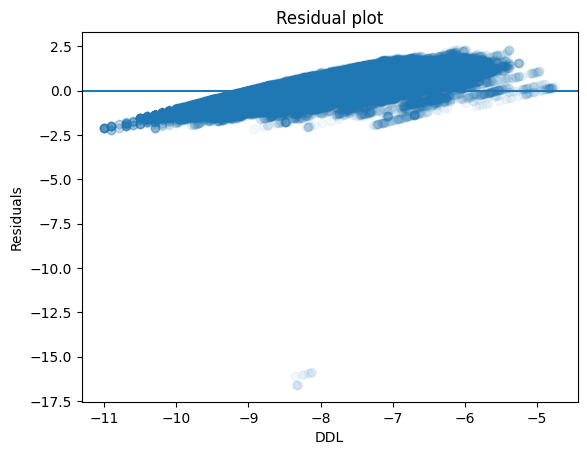

In [23]:
linear_model.fit(x, target)
x_train_test = train_data[["Scalar B, nT", "Flow pressure", "Kp index", "ap_index, nT", "AE-index, nT", "AU-index, nT",  "pc-index"]]
y_pred = linear_model.predict(x_train_test)

errors = target - y_pred
print("The mean squared errors are", np.sum(errors**2)/ len(errors))
plt.scatter(x = target, y = errors, alpha = 0.05)
plt.title("Residual plot")
plt.xlabel("DDL")
plt.ylabel("Residuals")
plt.axhline(y = 0)
print("Percentage of data above residual = 0 is ", sum(errors >= 0)/len(errors))

The mean squared errors are 0.3489543387908459
Percentage of data above residual = 0 is  0.4803180476091298


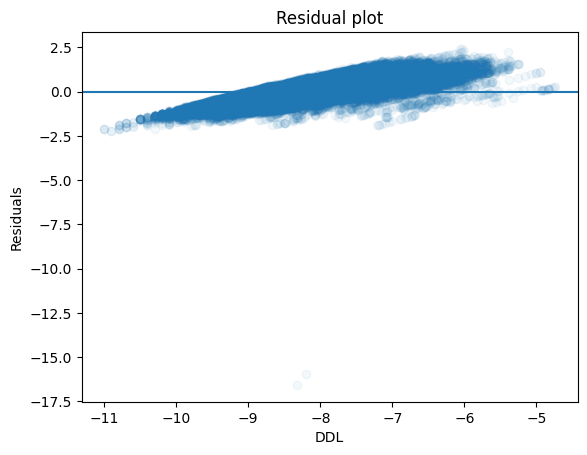

In [24]:
x_test = test_data[["Scalar B, nT", "Flow pressure", "Kp index", "ap_index, nT", "AE-index, nT", "AU-index, nT",  "pc-index"]]
y_test = test_data["magnitude for radial diffusion"]
y_pred = linear_model.predict(x_test)
errors = y_test - y_pred
print("The mean squared errors are", np.sum(errors**2)/ len(errors))
plt.scatter(x = y_test, y = errors, alpha = 0.05)
plt.title("Residual plot")
plt.xlabel("DDL")
plt.ylabel("Residuals")
plt.axhline(y = 0)
print("Percentage of data above residual = 0 is ", sum(errors >= 0)/len(errors))

### w/o isolating for variables for interest. not really valid tbh

In [25]:
x_columns = merged_df.columns.values[3:]
x_columns = x_columns.tolist()
x_columns.remove('YEAR')
x_columns.remove('magnitude for radial diffusion')
y = merged_df["magnitude for radial diffusion"]

In [26]:
#performing stepwise regression 

import statsmodels.api as sm

def get_stats():
    x = merged_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()



                                       OLS Regression Results                                      
Dep. Variable:     magnitude for radial diffusion   R-squared (uncentered):                   0.998
Model:                                        OLS   Adj. R-squared (uncentered):              0.998
Method:                             Least Squares   F-statistic:                          4.041e+06
Date:                            Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                                    05:15:01   Log-Likelihood:                     -1.9381e+05
No. Observations:                          408113   AIC:                                  3.877e+05
Df Residuals:                              408067   BIC:                                  3.882e+05
Df Model:                                      46                                                  
Covariance Type:                        nonrobust                                                  


In [27]:
x = merged_df[x_columns]
linear_model = LinearRegression()
linear_model.fit(x, y)
x_test = merged_df[x_columns]
y_pred = linear_model.predict(x_test)
print("Prediction for DDL is ", y_pred)
print("Errors of DDL ")

Prediction for DDL is  [-9.06039998 -9.04477258 -9.04353003 ... -8.45214535 -8.43352021
 -8.41160862]
Errors of DDL 


The mean of the errors is  -2.9555964848616584e-16
Percentage of data above residual = 0 is  0.5372458118217258


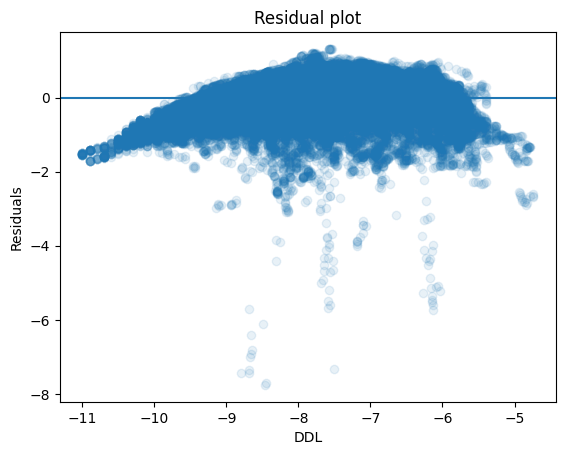

In [28]:
errors = y - y_pred
print("The mean of the errors is ", np.mean(errors))
plt.scatter(x = y, y = errors, alpha = 0.1)
plt.title("Residual plot")
plt.xlabel("DDL")
plt.ylabel("Residuals")
plt.axhline(y = 0)
print("Percentage of data above residual = 0 is ", sum(errors >= 0)/len(errors))

From this graph, we see that the residual plot is not random, which indicates that the model is not great. However, most of the residuals are centered around 0, which is a property of a good linear model. Since all the p-values were 0 (which is not something to be expected) and the residual plot is not random, I'm going to try constructing this model from a different approach) 

In [29]:
#removing the variables with very small coefficients 
removal_1 = ["Long. Angle of B (GSE)", "SW Plasma Temperature, K", "sigma-T,K"]
x_columns = [x for x in x_columns if x not in removal_1]
def get_stats():
    x = merged_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                       OLS Regression Results                                      
Dep. Variable:     magnitude for radial diffusion   R-squared (uncentered):                   0.998
Model:                                        OLS   Adj. R-squared (uncentered):              0.998
Method:                             Least Squares   F-statistic:                          4.313e+06
Date:                            Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                                    05:15:13   Log-Likelihood:                     -1.9431e+05
No. Observations:                          408113   AIC:                                  3.887e+05
Df Residuals:                              408070   BIC:                                  3.892e+05
Df Model:                                      43                                                  
Covariance Type:                        nonrobust                                                  


Prediction for DDL is  [-9.06610323 -9.0504725  -9.04923035 ... -8.44730275 -8.42867978
 -8.4067745 ]
The mean of the errors is  2.0627890641282357e-16
Percentage of data above residual = 0 is  0.5370056822497691


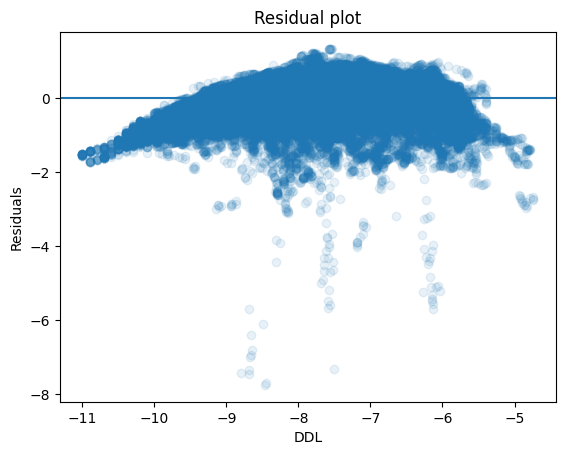

In [30]:
x = merged_df[x_columns]
linear_model = LinearRegression()
linear_model.fit(x, y)
x_test = merged_df[x_columns]
y_pred = linear_model.predict(x_test)
print("Prediction for DDL is ", y_pred)

errors = y - y_pred
print("The mean of the errors is ", np.mean(errors))
plt.scatter(x = y, y = errors, alpha = 0.1)
plt.title("Residual plot")
plt.xlabel("DDL")
plt.ylabel("Residuals")
plt.axhline(y = 0)
print("Percentage of data above residual = 0 is ", sum(errors >= 0)/len(errors))

Now I'll be removing "Alfen mach number" because it has a p-value which is greater than 0.05

In [31]:
#removing the variables with very small coefficients 
x_columns.remove("Alfen mach number")
def get_stats():
    x = merged_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                       OLS Regression Results                                      
Dep. Variable:     magnitude for radial diffusion   R-squared (uncentered):                   0.998
Model:                                        OLS   Adj. R-squared (uncentered):              0.998
Method:                             Least Squares   F-statistic:                          4.415e+06
Date:                            Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                                    05:15:25   Log-Likelihood:                     -1.9431e+05
No. Observations:                          408113   AIC:                                  3.887e+05
Df Residuals:                              408071   BIC:                                  3.892e+05
Df Model:                                      42                                                  
Covariance Type:                        nonrobust                                                  


Prediction for DDL is  [-9.06860506 -9.05298738 -9.05174585 ... -8.44959096 -8.43097968
 -8.40908581]
The mean of the errors is  1.0300016967743622e-15
Percentage of data above residual = 0 is  0.5372556130287445


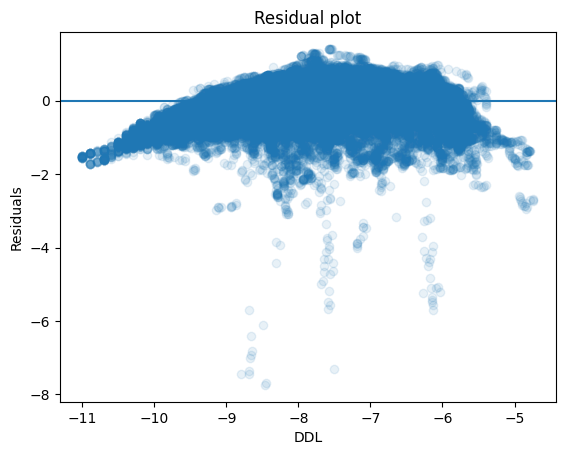

In [32]:
x = merged_df[x_columns]
linear_model = LinearRegression()
linear_model.fit(x, y)
x_test = merged_df[x_columns]
y_pred = linear_model.predict(x_test)
print("Prediction for DDL is ", y_pred)

errors = y - y_pred
print("The mean of the errors is ", np.mean(errors))
plt.scatter(x = y, y = errors, alpha = 0.1)
plt.title("Residual plot")
plt.xlabel("DDL")
plt.ylabel("Residuals")
plt.axhline(y = 0)
print("Percentage of data above residual = 0 is ", sum(errors >= 0)/len(errors))

### non-backtracking approach

In [33]:
x_columns_1 = ["Kp index"]

def get_stats():
    x = merged_df[x_columns_1]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()


                                       OLS Regression Results                                      
Dep. Variable:     magnitude for radial diffusion   R-squared (uncentered):                   0.660
Model:                                        OLS   Adj. R-squared (uncentered):              0.660
Method:                             Least Squares   F-statistic:                          7.933e+05
Date:                            Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                                    05:15:29   Log-Likelihood:                     -1.2231e+06
No. Observations:                          408113   AIC:                                  2.446e+06
Df Residuals:                              408112   BIC:                                  2.446e+06
Df Model:                                       1                                                  
Covariance Type:                        nonrobust                                                  


In [34]:
x_columns_1.append("hourly variance for the magnetopause")

def get_stats():
    x = merged_df[x_columns_1]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()


                                       OLS Regression Results                                      
Dep. Variable:     magnitude for radial diffusion   R-squared (uncentered):                   0.664
Model:                                        OLS   Adj. R-squared (uncentered):              0.664
Method:                             Least Squares   F-statistic:                          4.030e+05
Date:                            Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                                    05:15:29   Log-Likelihood:                     -1.2209e+06
No. Observations:                          408113   AIC:                                  2.442e+06
Df Residuals:                              408111   BIC:                                  2.442e+06
Df Model:                                       2                                                  
Covariance Type:                        nonrobust                                                  


Prediction for DDL is  [-8.96652611 -8.96844872 -8.96818169 ... -8.69214674 -8.69054456
 -8.6862721 ]
The mean squared errors are 0.3145640067693482
Percentage of data above residual = 0 is  0.4865392673107693


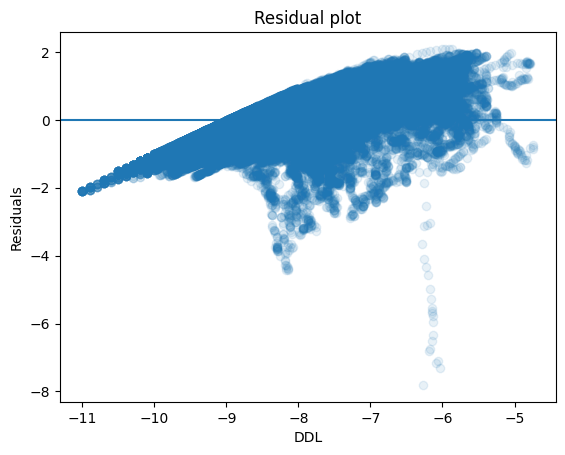

In [35]:
x = merged_df[x_columns_1]
linear_model = LinearRegression()
linear_model.fit(x, y)
x_test = merged_df[x_columns_1]
y_pred = linear_model.predict(x_test)
print("Prediction for DDL is ", y_pred)

errors = y - y_pred
print("The mean squared errors are", np.sum(errors**2)/ len(errors))
plt.scatter(x = y, y = errors, alpha = 0.1)
plt.title("Residual plot")
plt.xlabel("DDL")
plt.ylabel("Residuals")
plt.axhline(y = 0)
print("Percentage of data above residual = 0 is ", sum(errors >= 0)/len(errors))

In [36]:
x_columns_1.append("Flow pressure")

def get_stats():
    x = merged_df[x_columns_1]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()


                                       OLS Regression Results                                      
Dep. Variable:     magnitude for radial diffusion   R-squared (uncentered):                   0.734
Model:                                        OLS   Adj. R-squared (uncentered):              0.734
Method:                             Least Squares   F-statistic:                          3.748e+05
Date:                            Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                                    05:15:31   Log-Likelihood:                     -1.1734e+06
No. Observations:                          408113   AIC:                                  2.347e+06
Df Residuals:                              408110   BIC:                                  2.347e+06
Df Model:                                       3                                                  
Covariance Type:                        nonrobust                                                  


Prediction for DDL is  [-8.81582564 -8.81771231 -8.81745027 ... -8.64283172 -8.64125949
 -8.63706689]
The mean squared errors are 0.2547230636348527
Percentage of data above residual = 0 is  0.4947918836204679


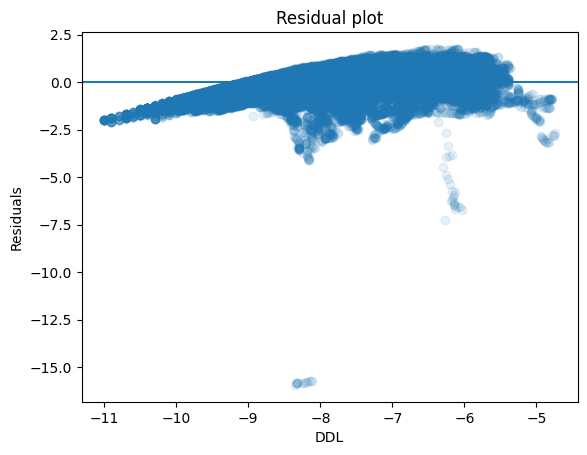

In [37]:
x = merged_df[x_columns_1]
linear_model = LinearRegression()
linear_model.fit(x, y)
x_test = merged_df[x_columns_1]
y_pred = linear_model.predict(x_test)
print("Prediction for DDL is ", y_pred)

errors = y - y_pred
print("The mean squared errors are", np.sum(errors**2)/ len(errors))
plt.scatter(x = y, y = errors, alpha = 0.1)
plt.title("Residual plot")
plt.xlabel("DDL")
plt.ylabel("Residuals")
plt.axhline(y = 0)
print("Percentage of data above residual = 0 is ", sum(errors >= 0)/len(errors))

In [38]:
# testing our model

### Performing Principal Component Analysis [data reduction technique] decided not to do bc PCA doesn't make sense with supervised learning

Small paragraph about PCA: credit to Data 100. Since there are lots of columns and features , I performed principal component analysis to determine how I would reduce the data. PCA finds a line that minimizes the error residuals but maximizes going through the entire points (https://www.youtube.com/watch?v=TJdH6rPA-TI&ab_channel=Computerphile)

In [39]:
#copy_merged = merged_df.copy()
#copy_merged.drop("YEAR", axis = 1)
#df_standardized = (copy_merged - np.mean(copy_merged, axis =0))/ np.std(copy_merged, axis = 0)

In [40]:
#standardizing the data and conducting PCA

stand_arr = []
dropped_cols = []
not_dropped_cols = []
for column in merged_df.columns.values[3:]:
    stand = (merged_df[column] - np.mean(merged_df[column])) / np.std(merged_df[column])
    if stand.isnull().any():
        dropped_cols.append(column)
        continue
    else:
        stand_arr.append(stand)
        not_dropped_cols.append(column)

stand_arr = np.array(stand_arr)
stand_arr.shape
#stand_arr.shape(408108, 95)
#stand_arr
print("dropped columns: ", dropped_cols)

dropped columns:  ['YEAR']


In [41]:
u, s, vt = np.linalg.svd(stand_arr, full_matrices = False)

In [42]:
merged_df_total_variance = np.sum(s**2) / len(stand_arr)
merged_df_total_variance
print("Merged dataframe total variance: ", merged_df_total_variance)

Merged dataframe total variance:  408113.0000000009


In [43]:
# vt.T

In [44]:
# merged_df_2d = stand_arr @ vt[:13, :].T
# first_12_pcs = (stand_arr @ vt[0:13, :].T)

In [45]:
# merged_df_2d_variance = (np.sum(s[:13]**2)/stand_arr.shape[0]) / merged_df_total_variance
# merged_df_2d_variance
# print("The proportion of the total variance that is accounted for when we project the merged dataset together down to 13 dimensions is ", merged_df_2d_variance)

In [46]:
# merged_df_center = merged_df.iloc[:, 3:] - np.mean(merged_df.iloc[:, 3:], axis = 0)
# merged_df_center = merged_df_center.drop('YEAR', axis = 1)
# merged_df_center.head()

In [47]:
input_1 = 0

In [48]:
merged_df.head()

,Date,Day-of-year,hourly avg location for the magnetopause B_barre,hourly variance for the magnetopause,lifetime for the autocorrelation function,magnitude for radial diffusion,Hour,YEAR,DOY,"Scalar B, nT",...,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha
0,1995/01/01,1,9.73e+00,0.00360,2.05,-9.11,4,1995.0,1,4.8,...,0.0,13.0,3.0,0.0,72.9,31.0,-10.0,19.0,-0.1,0.006201
1,1995/01/01,1,9.73e+00,0.00324,2.22,-9.12,4,1995.0,1,4.8,...,0.0,13.0,3.0,0.0,72.9,31.0,-10.0,19.0,-0.1,0.006201
2,1995/01/01,1,9.73e+00,0.00329,2.23,-9.12,4,1995.0,1,4.8,...,0.0,13.0,3.0,0.0,72.9,31.0,-10.0,19.0,-0.1,0.006201
3,1995/01/01,1,9.73e+00,0.00320,2.25,-9.12,4,1995.0,1,4.8,...,0.0,13.0,3.0,0.0,72.9,31.0,-10.0,19.0,-0.1,0.006201
4,1995/01/01,1,9.73e+00,0.00312,2.26,-9.13,4,1995.0,1,4.8,...,0.0,13.0,3.0,0.0,72.9,31.0,-10.0,19.0,-0.1,0.006201


In [49]:
# sns.jointplot(
#     data= merged_df,
#     x="Kp index", y="magnitude for radial diffusion",
#     kind="kde"
# )
# plt.title("Density plot of the Kp index verus DDL")
# plt.ylabel("DDL")

/tmp/ipykernel_88/217355653.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a= merged_df["Kp index"], bins=40, color='purple',


<AxesSubplot: xlabel='Kp index', ylabel='Density'>

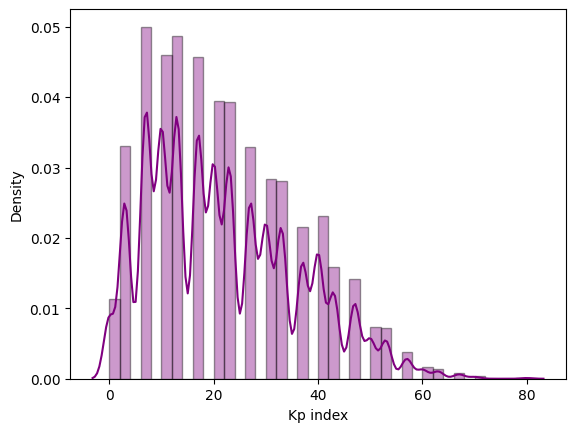

In [50]:
#plotting density plots to get a better understanding how Kp index
sns.distplot(a= merged_df["Kp index"], bins=40, color='purple',
             hist_kws={"edgecolor": 'black'})

In [51]:
#sns.kdeplot(data = merged_df, x = "Day-of-year", y = "Kp index", fill = True).set(title='Bivariate density plot of the Kp-index and the Day of the Year')

#the three "holes" in the graph show where the highest concentration of points are
#from this plot, we can see that the concentration of points mainly occur at certain parts of the year (beginning, middle, end) and the kp-index is generally below 30
# shows that there is seasonality in the Kp-index because the seasons affect the magnetic field. 
# center of rotation of the Earth gets different amounts of heat in different seasons so the magnetic field changes -> geometric changes 

In [52]:
#winter_data = merged_df.iloc[0:120, :] #jan 1st - april 20th
#summer_data = merged_df.iloc[120:280, :] #
#fall_data = merged_df.iloc[280: , :]

In [53]:
#print("Correlation between kp index and DDL: ", np.corrcoef(merged_df["Kp index"], merged_df["magnitude for radial diffusion"])[0][1])
#print("Correlation during the wintertime: ", np.corrcoef(winter_data["Kp index"], winter_data["magnitude for radial diffusion"])[0][1])
#print("Correlation during the summertime: ", np.corrcoef(summer_data["Kp index"], summer_data["magnitude for radial diffusion"])[0][1])
#print("Correlation during the fall: ", np.corrcoef(fall_data["Kp index"], fall_data["magnitude for radial diffusion"])[0][1])

In [54]:
#sns.kdeplot(data = winter_data, x = "Day-of-year", y = "Kp index", fill = True).set(title='Bivariate density plot of the Kp-index and the Day of the Year')


# make linear regression models

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=28a83fbe-9ed8-4ad0-ab71-9db262ace005' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>